# Análisis de la Poblacion Mundial

**Importamos librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargamos los datos

In [2]:
df = pd.read_csv('data/poblacion.csv')

In [3]:
df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


**Cantidad de filas y columnas del Data Frame**

In [699]:
n_filas = df.shape[0]
n_cols = df.shape[1]
print('El Data Frame tiene',n_filas,'filas y ', n_cols, 'columnas.')

El Data Frame tiene 280932 filas y  10 columnas.


**Nombres de las Columnas**

In [700]:
name_cols = df.columns
name_cols

Index(['LocID', 'Location', 'VarID', 'Variant', 'Time', 'MidPeriod', 'PopMale',
       'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')

**Vemos la informacion basica del dataframe**

In [701]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280932 entries, 0 to 280931
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LocID       280932 non-null  int64  
 1   Location    280932 non-null  object 
 2   VarID       280932 non-null  int64  
 3   Variant     280932 non-null  object 
 4   Time        280932 non-null  int64  
 5   MidPeriod   280932 non-null  float64
 6   PopMale     250876 non-null  float64
 7   PopFemale   250876 non-null  float64
 8   PopTotal    280932 non-null  float64
 9   PopDensity  280932 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.4+ MB


**Describimos el dataframe con describe()**

In [702]:
df_describe = df.describe(include='all')[['PopMale','PopFemale', 'PopTotal', 'PopDensity']]
df_describe

,PopMale,PopFemale,PopTotal,PopDensity
count,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
unique,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN
mean,2.324362e+05,2.298754e+05,4.128536e+05,426.659040
std,6.938837e+05,6.829825e+05,1.308911e+06,2418.990784
min,6.812000e+00,6.889000e+00,1.510000e-01,0.052000
25%,1.847834e+03,1.860604e+03,1.240100e+03,34.205250
50%,1.136849e+04,1.164585e+04,1.420555e+04,91.590000
75%,8.526402e+04,8.648854e+04,1.171661e+05,216.985750


## Paises con datos faltantes

**Valores missing values en cada columna**

In [703]:
missing_values = np.sum(df.isnull())
missing_values

LocID             0
Location          0
VarID             0
Variant           0
Time              0
MidPeriod         0
PopMale       30056
PopFemale     30056
PopTotal          0
PopDensity        0
dtype: int64

**Paises con valores Nulos**

In [704]:
paises_null = df[df.PopMale.isnull()]
paises_null.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
4744,16,American Samoa,2,Medium,1950,1950.5,NaN,NaN,18.941,94.705
4745,16,American Samoa,2,Medium,1951,1951.5,NaN,NaN,19.287,96.435
4746,16,American Samoa,2,Medium,1952,1952.5,NaN,NaN,19.546,97.730
4747,16,American Samoa,2,Medium,1953,1953.5,NaN,NaN,19.699,98.495
4748,16,American Samoa,2,Medium,1954,1954.5,NaN,NaN,19.758,98.790


In [705]:
paises_null['Location'].unique()

array(['American Samoa', 'Andorra', 'Anguilla', 'Bermuda',
       'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands',
       'Cayman Islands', 'Cook Islands', 'Dominica',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Gibraltar',
       'Greenland', 'Holy See', 'Isle of Man', 'Liechtenstein',
       'Marshall Islands', 'Monaco', 'Montserrat', 'Nauru', 'Niue',
       'Northern Mariana Islands', 'Palau', 'Saint Barthélemy',
       'Saint Helena', 'Saint Kitts and Nevis',
       'Saint Martin (French part)', 'Saint Pierre and Miquelon',
       'San Marino', 'Sint Maarten (Dutch part)', 'Tokelau',
       'Turks and Caicos Islands', 'Tuvalu', 'Wallis and Futuna Islands'],
      dtype=object)

**Mostramos todos los paises que han sidos analizados**

In [706]:
df_pais = df.Location.unique()

In [707]:
cant_pais= len(df_pais)
print('La cantidad de paises que estan presentes son:', cant_pais)

La cantidad de paises que estan presentes son: 474


**Cantidad de Datos que aparecen de cada pais**

In [708]:
veces_rep_pais = df.groupby('Location').count().PopTotal
veces_rep_pais

Location
Afghanistan                                     884
Africa                                          884
African Group                                   151
African Union                                   151
African Union: Central Africa                   151
                                               ... 
World                                           884
World Bank Regional Groups (developing only)    151
Yemen                                           884
Zambia                                          884
Zimbabwe                                        884
Name: PopTotal, Length: 474, dtype: int64

### Filtramos por las columnas VarID, Variant entre los años 2000-2020

In [709]:
df1 = df[(df.VarID==2)& (df.Time>1998) & (df.Time<2021)][['Location','VarID','Variant','Time','PopTotal']]
df1.head()

,Location,VarID,Variant,Time,PopTotal
49,Afghanistan,2,Medium,1999,20170.847
50,Afghanistan,2,Medium,2000,20779.957
51,Afghanistan,2,Medium,2001,21606.992
52,Afghanistan,2,Medium,2002,22600.774
53,Afghanistan,2,Medium,2003,23680.871


In [710]:
df1=df1.set_index('Location')
df1.head()

,VarID,Variant,Time,PopTotal
Location,,,,
Afghanistan,2,Medium,1999,20170.847
Afghanistan,2,Medium,2000,20779.957
Afghanistan,2,Medium,2001,21606.992
Afghanistan,2,Medium,2002,22600.774
Afghanistan,2,Medium,2003,23680.871


In [711]:
poblacion = df1[['PopTotal']]
poblacion.head()

,PopTotal
Location,
Afghanistan,20170.847
Afghanistan,20779.957
Afghanistan,21606.992
Afghanistan,22600.774
Afghanistan,23680.871


In [712]:
poblacion= poblacion.diff(axis=0,periods=1)
poblacion.head()

,PopTotal
Location,
Afghanistan,NaN
Afghanistan,609.110
Afghanistan,827.035
Afghanistan,993.782
Afghanistan,1080.097


In [713]:
PopT = df1[['PopTotal']]
PopT.head()

,PopTotal
Location,
Afghanistan,20170.847
Afghanistan,20779.957
Afghanistan,21606.992
Afghanistan,22600.774
Afghanistan,23680.871


In [714]:
PopT = PopT.shift(1,axis=0)
PopT.head()

,PopTotal
Location,
Afghanistan,NaN
Afghanistan,20170.847
Afghanistan,20779.957
Afghanistan,21606.992
Afghanistan,22600.774


In [715]:
df2= df1.assign(Incremento= poblacion,PopTotal_Ant=PopT)
print(df2)

             VarID Variant  Time   PopTotal  Incremento  PopTotal_Ant
Location                                                             
Afghanistan      2  Medium  1999  20170.847         NaN           NaN
Afghanistan      2  Medium  2000  20779.957     609.110     20170.847
Afghanistan      2  Medium  2001  21606.992     827.035     20779.957
Afghanistan      2  Medium  2002  22600.774     993.782     21606.992
Afghanistan      2  Medium  2003  23680.871    1080.097     22600.774
...            ...     ...   ...        ...         ...           ...
Zimbabwe         2  Medium  2016  14030.338     215.696     13814.642
Zimbabwe         2  Medium  2017  14236.599     206.261     14030.338
Zimbabwe         2  Medium  2018  14438.812     202.213     14236.599
Zimbabwe         2  Medium  2019  14645.473     206.661     14438.812
Zimbabwe         2  Medium  2020  14862.927     217.454     14645.473

[10494 rows x 6 columns]


In [716]:
tasa = round((df2.Incremento/df2.PopTotal_Ant)*100,2)
tasa.head()

Location
Afghanistan     NaN
Afghanistan    3.02
Afghanistan    3.98
Afghanistan    4.60
Afghanistan    4.78
dtype: float64

In [717]:
df2= df1.assign(Incremento= poblacion,PopTotal_Ant=PopT,Tasa_Crec=tasa)
print(df2)

             VarID Variant  Time   PopTotal  Incremento  PopTotal_Ant  \
Location                                                                
Afghanistan      2  Medium  1999  20170.847         NaN           NaN   
Afghanistan      2  Medium  2000  20779.957     609.110     20170.847   
Afghanistan      2  Medium  2001  21606.992     827.035     20779.957   
Afghanistan      2  Medium  2002  22600.774     993.782     21606.992   
Afghanistan      2  Medium  2003  23680.871    1080.097     22600.774   
...            ...     ...   ...        ...         ...           ...   
Zimbabwe         2  Medium  2016  14030.338     215.696     13814.642   
Zimbabwe         2  Medium  2017  14236.599     206.261     14030.338   
Zimbabwe         2  Medium  2018  14438.812     202.213     14236.599   
Zimbabwe         2  Medium  2019  14645.473     206.661     14438.812   
Zimbabwe         2  Medium  2020  14862.927     217.454     14645.473   

             Tasa_Crec  
Location                


### Tasa de Crecimiento poblacion anual media de todos los paises 2000-2020

In [718]:
df2

,VarID,Variant,Time,PopTotal,Incremento,PopTotal_Ant,Tasa_Crec
Location,,,,,,,
Afghanistan,2,Medium,1999,20170.847,NaN,NaN,NaN
Afghanistan,2,Medium,2000,20779.957,609.110,20170.847,3.02
Afghanistan,2,Medium,2001,21606.992,827.035,20779.957,3.98
Afghanistan,2,Medium,2002,22600.774,993.782,21606.992,4.60
Afghanistan,2,Medium,2003,23680.871,1080.097,22600.774,4.78
...,...,...,...,...,...,...,...
Zimbabwe,2,Medium,2016,14030.338,215.696,13814.642,1.56
Zimbabwe,2,Medium,2017,14236.599,206.261,14030.338,1.47
Zimbabwe,2,Medium,2018,14438.812,202.213,14236.599,1.42


In [719]:
df2 = df2[df2.Time!=1999]

### Tasa de crecimiento por País

In [720]:
anual_x_pais= round(df2.groupby('Location').mean()['Tasa_Crec'],2)
anual_x_pais

Location
Afghanistan                                     3.18
Africa                                          2.54
African Group                                   2.54
African Union                                   2.54
African Union: Central Africa                   3.08
                                                ... 
World                                           1.20
World Bank Regional Groups (developing only)    1.32
Yemen                                           2.74
Zambia                                          2.87
Zimbabwe                                        1.10
Name: Tasa_Crec, Length: 474, dtype: float64

**Los 10 países que tienen mayor tasa de crecimiento poblacional anual media en ese periodo**

In [721]:
anual_x_pais.nlargest(11)

Location
Qatar                                        8.16
United Arab Emirates                         6.03
Bahrain                                      4.81
Equatorial Guinea                            4.28
Oman                                         3.99
Niger                                        3.86
Kuwait                                       3.81
Angola                                       3.53
ESCWA: Gulf Cooperation Council countries    3.49
Gulf Cooperation Council (GCC)               3.49
Chad                                         3.45
Name: Tasa_Crec, dtype: float64

**Grafica de los 10 paises con mayor tasa**

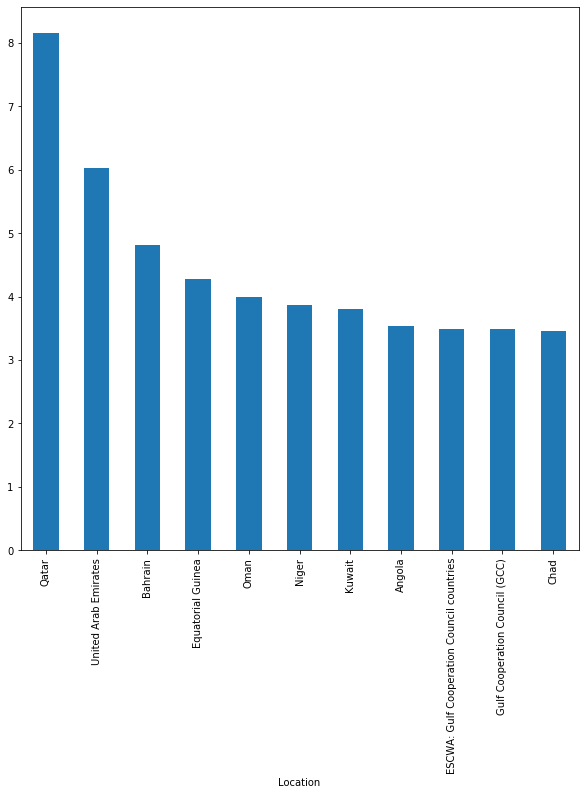

In [722]:
anual_x_pais.nlargest(11).plot(kind='bar',figsize=(10,10))

**Paises con menor tasa de Crecimiento**

In [723]:
anual_x_pais.nsmallest(11)

Location
Lithuania                   -1.23
Wallis and Futuna Islands   -1.22
Latvia                      -1.16
Puerto Rico                 -1.16
Niue                        -0.89
Bulgaria                    -0.71
Romania                     -0.70
Tokelau                     -0.69
Bosnia and Herzegovina      -0.63
Ukraine                     -0.57
Montserrat                  -0.55
Name: Tasa_Crec, dtype: float64

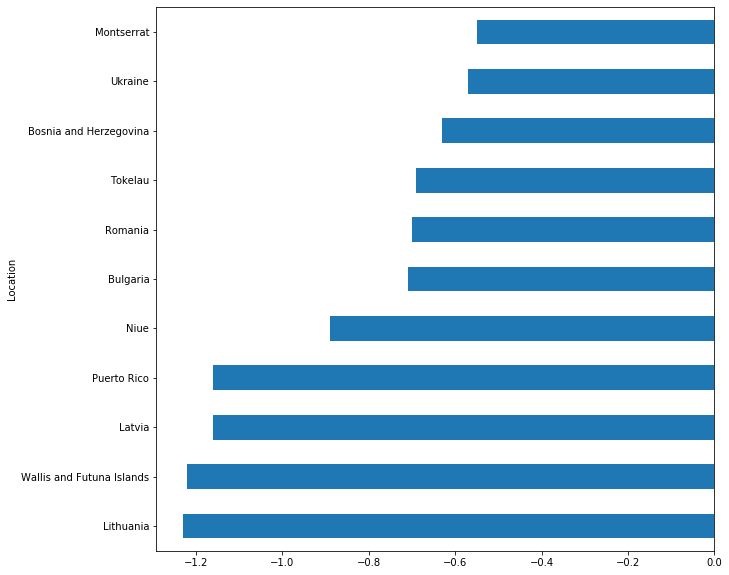

In [724]:
anual_x_pais.nsmallest(11).plot(kind='barh',figsize=(10,10))

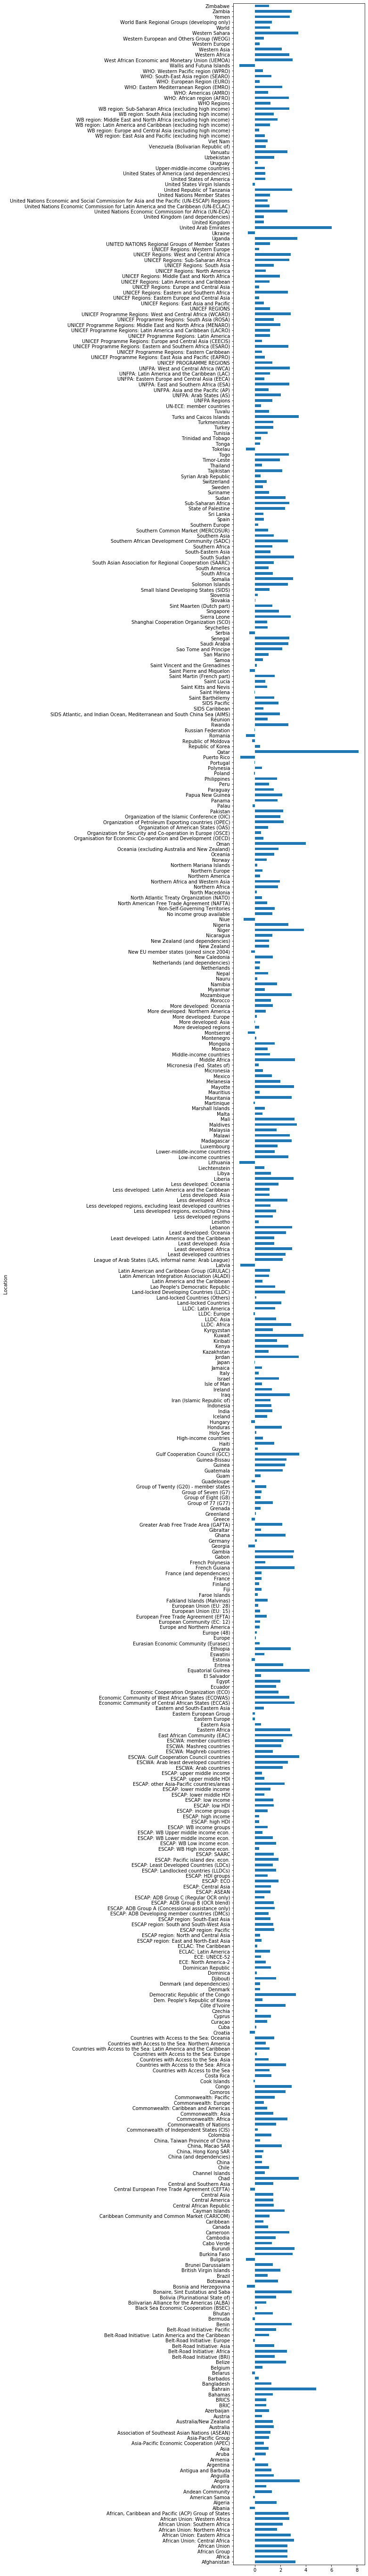

In [725]:
anual_x_pais.plot(kind='barh',figsize=(5,100))

In [726]:
#para filtrar con filas que quiero utilizo .loc[['','']]
a= anual_x_pais.loc[['Argentina','Brazil','Chile','Paraguay','Peru']]
a

Location
Argentina    1.03
Brazil       1.01
Chile        1.11
Paraguay     1.50
Peru         1.12
Name: Tasa_Crec, dtype: float64

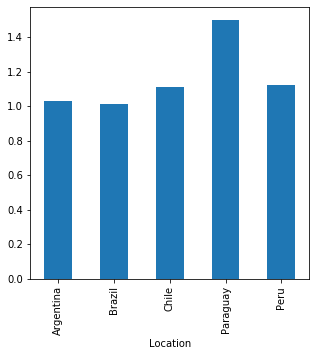

In [727]:
a.plot(kind='bar',figsize=(5,5))

# Población anual argentina en el periodo 2000-2020

In [728]:
df= pd.read_csv('data/poblacion.csv')

In [729]:
df1 = df[(df.Location=='Argentina')& (df.VarID==2) & (df.Time>1998) & (df.Time<2021)][['Location','VarID','Time','PopTotal']]
df1

,Location,VarID,Time,PopTotal
9364,Argentina,2,1999,36467.218
9365,Argentina,2,2000,36870.796
9366,Argentina,2,2001,37275.644
9367,Argentina,2,2002,37681.743
9368,Argentina,2,2003,38087.866
9369,Argentina,2,2004,38491.970
9370,Argentina,2,2005,38892.924
9371,Argentina,2,2006,39289.876
9372,Argentina,2,2007,39684.303
9373,Argentina,2,2008,40080.159


In [730]:
df1=df1.set_index('Location')
df1.head(2)

,VarID,Time,PopTotal
Location,,,
Argentina,2,1999,36467.218
Argentina,2,2000,36870.796


In [731]:
poblacion = df1[['PopTotal']]

In [732]:
poblacion = poblacion.diff(axis=0,periods=1)

In [733]:
PopT = df1[['PopTotal']]

In [734]:
PopT = PopT.shift(1,axis=0)

In [735]:
Tasa = round((poblacion/PopT)*100,2)

**Tasa de Crecimiento por cada año 2000-2020**

In [736]:
df2 = df1.assign(Tasa=Tasa)
print(df2)

           VarID  Time   PopTotal  Tasa
Location                               
Argentina      2  1999  36467.218   NaN
Argentina      2  2000  36870.796  1.11
Argentina      2  2001  37275.644  1.10
Argentina      2  2002  37681.743  1.09
Argentina      2  2003  38087.866  1.08
Argentina      2  2004  38491.970  1.06
Argentina      2  2005  38892.924  1.04
Argentina      2  2006  39289.876  1.02
Argentina      2  2007  39684.303  1.00
Argentina      2  2008  40080.159  1.00
Argentina      2  2009  40482.786  1.00
Argentina      2  2010  40895.751  1.02
Argentina      2  2011  41320.497  1.04
Argentina      2  2012  41755.188  1.05
Argentina      2  2013  42196.034  1.06
Argentina      2  2014  42637.508  1.05
Argentina      2  2015  43075.416  1.03
Argentina      2  2016  43508.459  1.01
Argentina      2  2017  43937.143  0.99
Argentina      2  2018  44361.150  0.97
Argentina      2  2019  44780.675  0.95
Argentina      2  2020  45195.777  0.93


In [737]:
tasa_x_año=df2[['Time','Tasa']]
tasa_x_año= round(f.groupby('Time')['Tasa'].mean(),2)
tasa_x_año

Time
2000    1.11
2001    1.10
2002    1.09
2003    1.08
2004    1.06
2005    1.04
2006    1.02
2007    1.00
2008    1.00
2009    1.00
2010    1.02
2011    1.04
2012    1.05
2013    1.06
2014    1.05
2015    1.03
2016    1.01
2017    0.99
2018    0.97
2019    0.95
2020    0.93
Name: Tasa, dtype: float64

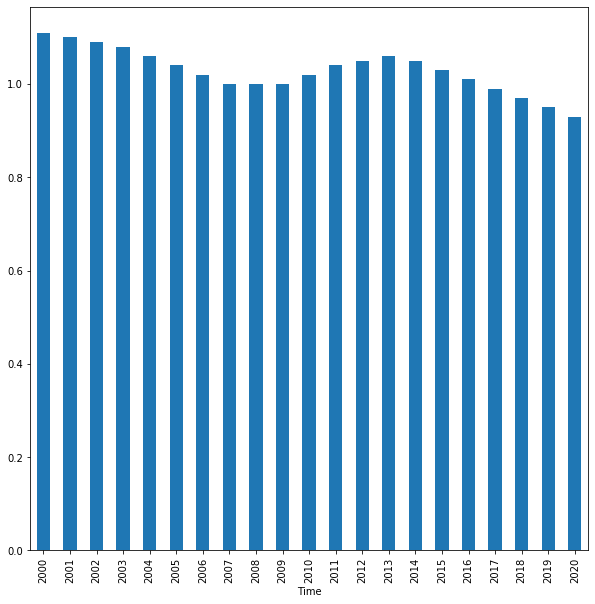

In [738]:
tasa_x_año.plot(kind='bar',figsize=(10,10))

In [739]:
df2= df2[df2.Time!=1999]

**Tasa de Crecimiento durante el periodo 2000-2020**

In [740]:
prom_Argentina= round(df2.groupby('Location')['Tasa'].mean(),2)
prom_Argentina

Location
Argentina    1.03
Name: Tasa, dtype: float64

In [741]:
da =pd.DataFrame([prom_Argentina]).T
print(da)

           Tasa
Location       
Argentina  1.03


**Con este resultado de la tasa de crecimiento de Argentina nos queda que lo que calculamos antes es correcto y lo comparamos con los demas paises**

In [742]:
a= anual_x_pais.loc[['Argentina','Brazil','Chile','Paraguay','Peru']]
a

Location
Argentina    1.03
Brazil       1.01
Chile        1.11
Paraguay     1.50
Peru         1.12
Name: Tasa_Crec, dtype: float64

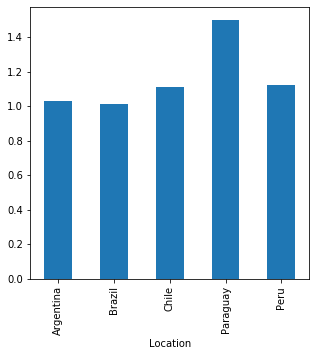

In [743]:
a.plot(kind='bar',figsize=(5,5))

# Poblacion Mundial 1950-2020

In [744]:
df= pd.read_csv('data/poblacion.csv')

In [745]:
df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [746]:
df1 = df[(df.VarID==2)& (df.Time>1949) & (df.Time<2021)][['Location','VarID','Variant','Time','PopTotal']]
df1

,Location,VarID,Variant,Time,PopTotal
0,Afghanistan,2,Medium,1950,7752.117
1,Afghanistan,2,Medium,1951,7840.151
2,Afghanistan,2,Medium,1952,7935.996
3,Afghanistan,2,Medium,1953,8039.684
4,Afghanistan,2,Medium,1954,8151.316
...,...,...,...,...,...
280114,Zimbabwe,2,Medium,2016,14030.338
280115,Zimbabwe,2,Medium,2017,14236.599
280116,Zimbabwe,2,Medium,2018,14438.812
280117,Zimbabwe,2,Medium,2019,14645.473


In [747]:
df1=df1.set_index('Location')
df1.head()

,VarID,Variant,Time,PopTotal
Location,,,,
Afghanistan,2,Medium,1950,7752.117
Afghanistan,2,Medium,1951,7840.151
Afghanistan,2,Medium,1952,7935.996
Afghanistan,2,Medium,1953,8039.684
Afghanistan,2,Medium,1954,8151.316


In [748]:
poblacion = df1[['PopTotal']]

In [749]:
poblacion = poblacion.diff(axis=0,periods=1)

In [750]:
PopT = df1[['PopTotal']]

In [751]:
PopT = PopT.shift(1,axis=0)

In [752]:
Tasa = round((poblacion/PopT)*100,2)

In [753]:
df2 = df1.assign(Tasa=Tasa)
print(df2)

             VarID Variant  Time   PopTotal  Tasa
Location                                         
Afghanistan      2  Medium  1950   7752.117   NaN
Afghanistan      2  Medium  1951   7840.151  1.14
Afghanistan      2  Medium  1952   7935.996  1.22
Afghanistan      2  Medium  1953   8039.684  1.31
Afghanistan      2  Medium  1954   8151.316  1.39
...            ...     ...   ...        ...   ...
Zimbabwe         2  Medium  2016  14030.338  1.56
Zimbabwe         2  Medium  2017  14236.599  1.47
Zimbabwe         2  Medium  2018  14438.812  1.42
Zimbabwe         2  Medium  2019  14645.473  1.43
Zimbabwe         2  Medium  2020  14862.927  1.48

[33867 rows x 5 columns]


In [754]:
df2

,VarID,Variant,Time,PopTotal,Tasa
Location,,,,,
Afghanistan,2,Medium,1950,7752.117,NaN
Afghanistan,2,Medium,1951,7840.151,1.14
Afghanistan,2,Medium,1952,7935.996,1.22
Afghanistan,2,Medium,1953,8039.684,1.31
Afghanistan,2,Medium,1954,8151.316,1.39
...,...,...,...,...,...
Zimbabwe,2,Medium,2016,14030.338,1.56
Zimbabwe,2,Medium,2017,14236.599,1.47
Zimbabwe,2,Medium,2018,14438.812,1.42


In [755]:
df2 = df2[df2.Time!=1950]

**Tasa de crecimiento en el periodo 1950**

In [756]:
tasa_x_pais=round(df2.groupby('Location')['Tasa'].mean(),2)
tasa_x_pais

Location
Afghanistan                                     2.36
Africa                                          2.57
African Group                                   2.57
African Union                                   2.57
African Union: Central Africa                   2.72
                                                ... 
World                                           1.62
World Bank Regional Groups (developing only)    1.83
Yemen                                           2.69
Zambia                                          3.01
Zimbabwe                                        2.45
Name: Tasa, Length: 474, dtype: float64

**LOs 10 paises con mayor tasa de crecimiento**

In [757]:
tasa_pais=tasa_x_pais.nlargest(11)
tasa_pais

Location
United Arab Emirates                         7.46
Qatar                                        7.09
Western Sahara                               5.63
Sint Maarten (Dutch part)                    4.97
Kuwait                                       4.95
Jordan                                       4.48
Mayotte                                      4.22
Djibouti                                     4.07
ESCWA: Gulf Cooperation Council countries    3.94
Gulf Cooperation Council (GCC)               3.94
Bahrain                                      3.93
Name: Tasa, dtype: float64

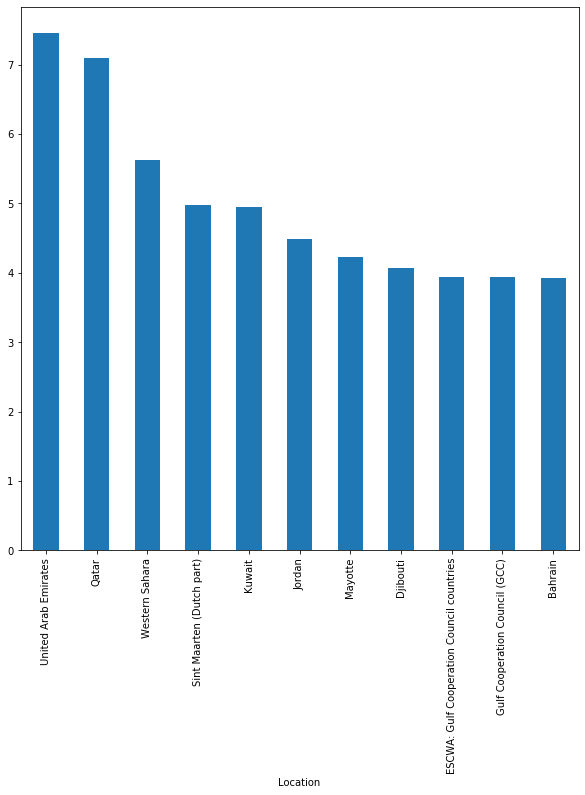

In [758]:
tasa_pais.plot(kind='bar',figsize=(10,10))

**Paises con menor tasa de crecimiento**

In [759]:
menor_tasa= tasa_x_pais.nsmallest(11)
menor_tasa

Location
Niue                    -1.48
Montserrat              -1.34
Tokelau                 -0.19
Holy See                -0.15
Bulgaria                -0.06
Latvia                  -0.02
Hungary                  0.05
Croatia                  0.09
Lithuania                0.09
Georgia                  0.18
Saint Kitts and Nevis    0.21
Name: Tasa, dtype: float64

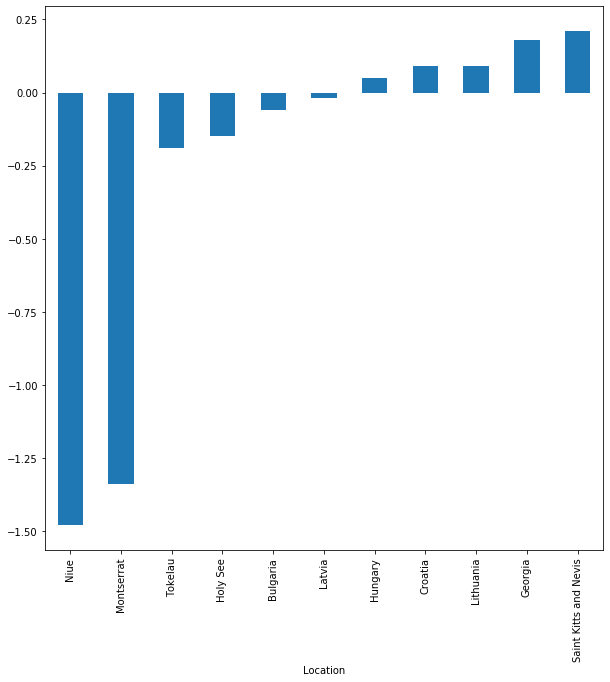

In [760]:
menor_tasa.plot(kind='bar',figsize=(10,10))

**Comparamos la tasa con otros paises limitrofes**, cuando agregue Bolivia me da error, por eso sume a Peru

In [761]:
a= tasa_x_pais.loc[['Argentina','Brazil','Chile','Paraguay','Peru']]
a

Location
Argentina    1.40
Brazil       1.98
Chile        1.53
Paraguay     2.28
Peru         2.09
Name: Tasa, dtype: float64

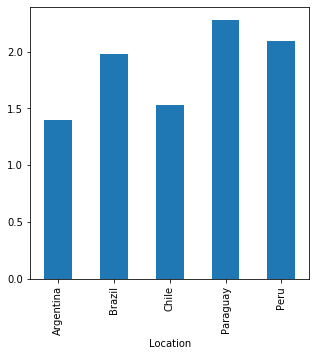

In [762]:
a.plot(kind='bar',figsize=(5,5))

# 4. Graficar para un caso acotado: Argentina, por quinqueños, y discriminando por sexo.

In [763]:
df = pd.read_csv('data/poblacion.csv')

In [764]:
df1 = df[(df.Location=='Argentina')& (df.VarID==2)& (df.Time>1946) & (df.Time<2021)][['Location','VarID','Time','PopMale']]
df1

,Location,VarID,Time,PopMale
9315,Argentina,2,1950,8682.761
9316,Argentina,2,1951,8852.371
9317,Argentina,2,1952,9021.292
9318,Argentina,2,1953,9189.295
9319,Argentina,2,1954,9356.229
...,...,...,...,...
9381,Argentina,2,2016,21205.599
9382,Argentina,2,2017,21419.801
9383,Argentina,2,2018,21631.673
9384,Argentina,2,2019,21841.415


In [765]:
df1.set_index('Location',inplace=True)

In [766]:
df1.head()

,VarID,Time,PopMale
Location,,,
Argentina,2,1950,8682.761
Argentina,2,1951,8852.371
Argentina,2,1952,9021.292
Argentina,2,1953,9189.295
Argentina,2,1954,9356.229


In [767]:
Male = df1[['PopMale']]

In [768]:
Male = Male.diff(axis=0,periods=1)

In [769]:
Malee = df1[['PopMale']]

In [770]:
Malee = Malee.shift(1,axis=0)

In [771]:
TasaMale = round((Male/Malee)*100,2)

In [772]:
df2 = df1.assign(TasaMale=TasaMale)
print(df2)

           VarID  Time    PopMale  TasaMale
Location                                   
Argentina      2  1950   8682.761       NaN
Argentina      2  1951   8852.371      1.95
Argentina      2  1952   9021.292      1.91
Argentina      2  1953   9189.295      1.86
Argentina      2  1954   9356.229      1.82
...          ...   ...        ...       ...
Argentina      2  2016  21205.599      1.03
Argentina      2  2017  21419.801      1.01
Argentina      2  2018  21631.673      0.99
Argentina      2  2019  21841.415      0.97
Argentina      2  2020  22049.146      0.95

[71 rows x 4 columns]


In [773]:
df2['Años']=['1950','1955','1955','1955','1955','1955','1960','1960','1960','1960','1960','1965','1965','1965','1965','1965','1970','1970','1970','1970','1970','1975','1975','1975','1975','1975','1980','1980','1980','1980','1980','1985','1985','1985','1985','1985','1990','1990','1990','1990','1990','1995','1995','1995','1995','1995','2000','2000','2000','2000','2000','2005','2005','2005','2005','2005','2010','2010','2010','2010','2010','2015','2015','2015','2015','2015','2020','2020','2020','2020','2020']
df2

,VarID,Time,PopMale,TasaMale,Años
Location,,,,,
Argentina,2,1950,8682.761,NaN,1950
Argentina,2,1951,8852.371,1.95,1955
Argentina,2,1952,9021.292,1.91,1955
Argentina,2,1953,9189.295,1.86,1955
Argentina,2,1954,9356.229,1.82,1955
...,...,...,...,...,...
Argentina,2,2016,21205.599,1.03,2020
Argentina,2,2017,21419.801,1.01,2020
Argentina,2,2018,21631.673,0.99,2020


In [774]:
df2.head()

,VarID,Time,PopMale,TasaMale,Años
Location,,,,,
Argentina,2,1950,8682.761,NaN,1950
Argentina,2,1951,8852.371,1.95,1955
Argentina,2,1952,9021.292,1.91,1955
Argentina,2,1953,9189.295,1.86,1955
Argentina,2,1954,9356.229,1.82,1955


**Tasa de Crecimiento por año de la poblacion Masculina de Argentina**

In [775]:
df2 = df2[df2.Time!=1949]

In [776]:
M= round(df2.groupby(['Años'])['TasaMale'].mean(),2)
M

Años
1950     NaN
1955    1.86
1960    1.64
1965    1.48
1970    1.40
1975    1.44
1980    1.40
1985    1.50
1990    1.45
1995    1.30
2000    1.10
2005    1.10
2010    1.04
2015    1.07
2020    0.99
Name: TasaMale, dtype: float64

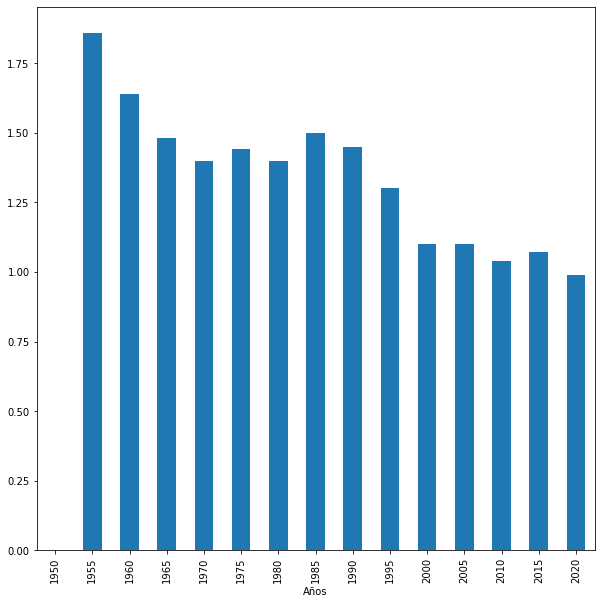

In [777]:
M.plot(kind='bar',figsize=(10,10))

In [778]:
tas= pd.DataFrame(M).T
tas

Años,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
TasaMale,NaN,1.86,1.64,1.48,1.4,1.44,1.4,1.5,1.45,1.3,1.1,1.1,1.04,1.07,0.99


Text(0, 0.5, 'Tasa')

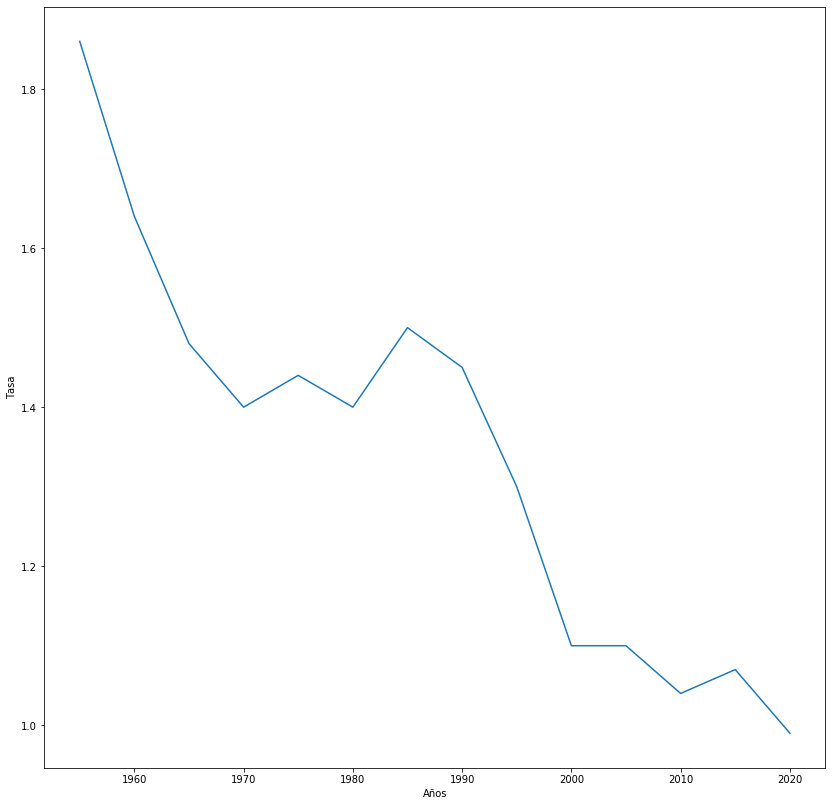

In [779]:
M.plot(figsize=(14,14))
plt.xlabel('Años')
plt.ylabel('Tasa')

# Analisis de la poblacion Femenina

In [780]:
df = pd.read_csv('data/poblacion.csv')

In [781]:
df1 = df[(df.Location=='Argentina')& (df.VarID==2)& (df.Time>1946) & (df.Time<2021)][['Location','VarID','Time','PopFemale','PopMale']]
df1

,Location,VarID,Time,PopFemale,PopMale
9315,Argentina,2,1950,8355.149,8682.761
9316,Argentina,2,1951,8538.007,8852.371
9317,Argentina,2,1952,8721.688,9021.292
9318,Argentina,2,1953,8904.995,9189.295
9319,Argentina,2,1954,9087.084,9356.229
...,...,...,...,...,...
9381,Argentina,2,2016,22302.860,21205.599
9382,Argentina,2,2017,22517.342,21419.801
9383,Argentina,2,2018,22729.477,21631.673
9384,Argentina,2,2019,22939.260,21841.415


In [782]:
df1.set_index('Location',inplace=True)

In [783]:
df1.head()

,VarID,Time,PopFemale,PopMale
Location,,,,
Argentina,2,1950,8355.149,8682.761
Argentina,2,1951,8538.007,8852.371
Argentina,2,1952,8721.688,9021.292
Argentina,2,1953,8904.995,9189.295
Argentina,2,1954,9087.084,9356.229


In [784]:
Female = df1[['PopFemale']]
Female.head(1)

,PopFemale
Location,
Argentina,8355.149


In [785]:
Female = Female.diff(axis=0,periods=1)
Female.head()

,PopFemale
Location,
Argentina,NaN
Argentina,182.858
Argentina,183.681
Argentina,183.307
Argentina,182.089


In [786]:
Femalee = df1[['PopFemale']]
Femalee.head(1)

,PopFemale
Location,
Argentina,8355.149


In [787]:
Femalee = Femalee.shift(1,axis=0)
Femalee.head(2)

,PopFemale
Location,
Argentina,NaN
Argentina,8355.149


In [788]:
TasaFemale = round((Female/Femalee)*100,2)

In [789]:
df2 = df1.assign(TasaFemale=TasaFemale)
print(df2)

           VarID  Time  PopFemale    PopMale  TasaFemale
Location                                                
Argentina      2  1950   8355.149   8682.761         NaN
Argentina      2  1951   8538.007   8852.371        2.19
Argentina      2  1952   8721.688   9021.292        2.15
Argentina      2  1953   8904.995   9189.295        2.10
Argentina      2  1954   9087.084   9356.229        2.04
...          ...   ...        ...        ...         ...
Argentina      2  2016  22302.860  21205.599        0.98
Argentina      2  2017  22517.342  21419.801        0.96
Argentina      2  2018  22729.477  21631.673        0.94
Argentina      2  2019  22939.260  21841.415        0.92
Argentina      2  2020  23146.631  22049.146        0.90

[71 rows x 5 columns]


In [790]:
df2['Años']=['1950','1955','1955','1955','1955','1955','1960','1960','1960','1960','1960','1965','1965','1965','1965','1965','1970','1970','1970','1970','1970','1975','1975','1975','1975','1975','1980','1980','1980','1980','1980','1985','1985','1985','1985','1985','1990','1990','1990','1990','1990','1995','1995','1995','1995','1995','2000','2000','2000','2000','2000','2005','2005','2005','2005','2005','2010','2010','2010','2010','2010','2015','2015','2015','2015','2015','2020','2020','2020','2020','2020']
df2

,VarID,Time,PopFemale,PopMale,TasaFemale,Años
Location,,,,,,
Argentina,2,1950,8355.149,8682.761,NaN,1950
Argentina,2,1951,8538.007,8852.371,2.19,1955
Argentina,2,1952,8721.688,9021.292,2.15,1955
Argentina,2,1953,8904.995,9189.295,2.10,1955
Argentina,2,1954,9087.084,9356.229,2.04,1955
...,...,...,...,...,...,...
Argentina,2,2016,22302.860,21205.599,0.98,2020
Argentina,2,2017,22517.342,21419.801,0.96,2020
Argentina,2,2018,22729.477,21631.673,0.94,2020


**Tasa de Crecimientom de la poblacion Femenina de Argentina**

In [791]:
df2 = df2[df2.Time!=1949]

In [792]:
F= round(df2.groupby(['Años'])['TasaFemale'].mean(),2)
F

Años
1950     NaN
1955    2.09
1960    1.84
1965    1.70
1970    1.61
1975    1.78
1980    1.64
1985    1.71
1990    1.63
1995    1.34
2000    1.19
2005    1.05
2010    0.98
2015    1.02
2020    0.94
Name: TasaFemale, dtype: float64

In [793]:
tas= pd.DataFrame(F).T
tas

Años,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
TasaFemale,NaN,2.09,1.84,1.7,1.61,1.78,1.64,1.71,1.63,1.34,1.19,1.05,0.98,1.02,0.94


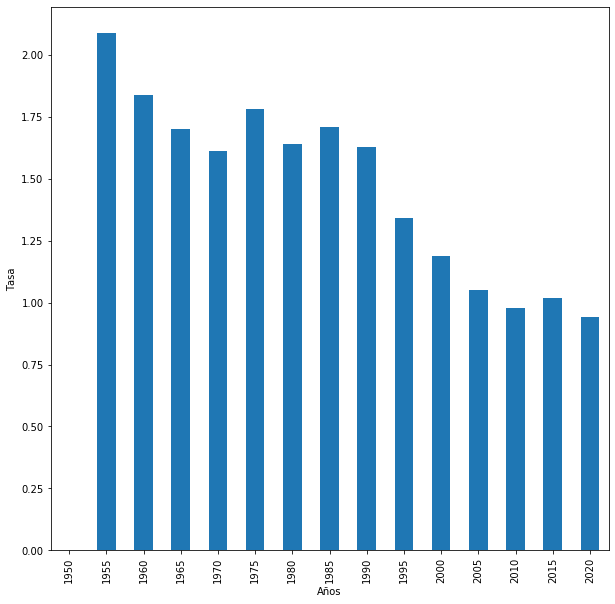

In [794]:
F= round(df2.groupby(['Años'])['TasaFemale'].mean(),2)
plt.xlabel('Años')
plt.ylabel('Tasa')
F.plot(kind='bar',figsize=(10,10))

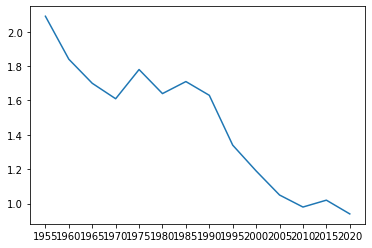

In [795]:
plt.plot(F)

# Tasa de Crecimiento quinqueños en el perdiodo 1950-2020

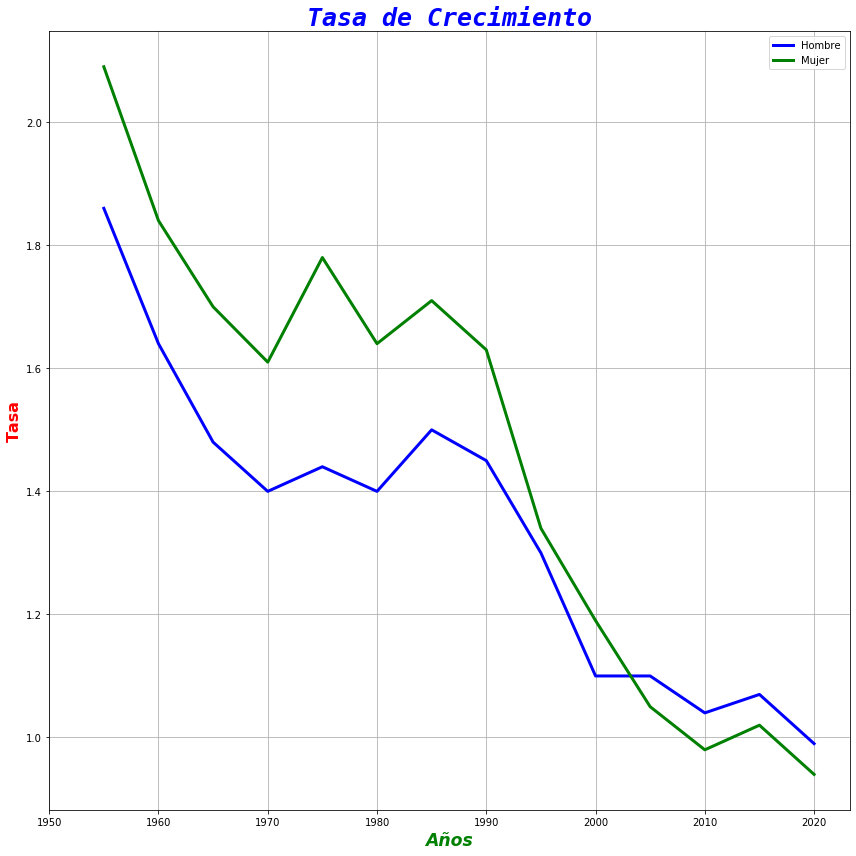

In [796]:

#alpha: agrando el tamaño de las lineas, letras..en dudas
# COLOR, GROSOR DE LA LINEA :color='blue',linewidth=3, label='linea'

ax= M.plot(figsize=(12,12),color='blue',linewidth=3, label='Hombre')
ax= F.plot(figsize=(12,12),color='green',linewidth=3, label='Mujer')
plt.xlabel('Años',color='green',fontsize='xx-large',fontweight='black',fontstyle='oblique')
#Negrita: fontweight='black'...tamaño de la fuente: fontsize='xx-large'..Color de fuente: color:'blue'
plt.ylabel('Tasa',color='red',fontsize= '16',fontweight='black')
plt.xlim(0)
ax.legend(labels = ('Hombre', 'Mujer'), loc = 'upper left') # legend placed at lower right
ax.set_title("Tasa de Crecimiento",fontstyle='italic', fontfamily='monospace', color='blue',fontsize='25',fontweight='black')
#Estilo:fontstyle='italic'...Espaciado:fontfamily='monospace'...
#color de fondo:#ax.plot(backgroundcolor='green')
#Mostrar leyenda, cuadricula y figura
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Creamos nuevos df para graficar en barras con ambas tasas de poblacion

In [797]:
#df5.assign(tas=tas)

a =pd.DataFrame(M)
a

,TasaMale
Años,
1950,NaN
1955,1.86
1960,1.64
1965,1.48
1970,1.40
1975,1.44
1980,1.40
1985,1.50
1990,1.45


In [798]:
b =pd.DataFrame(F)
b

,TasaFemale
Años,
1950,NaN
1955,2.09
1960,1.84
1965,1.70
1970,1.61
1975,1.78
1980,1.64
1985,1.71
1990,1.63


In [799]:
c = a.assign(TasaFemale=b)
print(c)

      TasaMale  TasaFemale
Años                      
1950       NaN         NaN
1955      1.86        2.09
1960      1.64        1.84
1965      1.48        1.70
1970      1.40        1.61
1975      1.44        1.78
1980      1.40        1.64
1985      1.50        1.71
1990      1.45        1.63
1995      1.30        1.34
2000      1.10        1.19
2005      1.10        1.05
2010      1.04        0.98
2015      1.07        1.02
2020      0.99        0.94


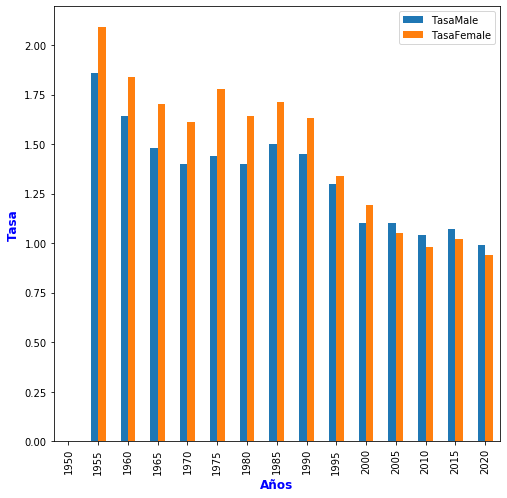

In [800]:
c.plot(kind='bar',figsize=(8,8))
plt.xlabel('Años',color='blue',fontsize='12',fontweight='black')
plt.ylabel('Tasa',color='blue',fontsize= '12',fontweight='black')
plt.show()

## Crecimiento de poblacion femenino y masculino en todo el periodo de 1950-2020

In [5]:
df.head(2)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009


In [6]:
df1 = df[(df.Location=='Argentina')& (df.VarID==2)& (df.Time>1946) & (df.Time<2021)][['Location','VarID','Time','PopFemale','PopMale']]
df1

,Location,VarID,Time,PopFemale,PopMale
9315,Argentina,2,1950,8355.149,8682.761
9316,Argentina,2,1951,8538.007,8852.371
9317,Argentina,2,1952,8721.688,9021.292
9318,Argentina,2,1953,8904.995,9189.295
9319,Argentina,2,1954,9087.084,9356.229
...,...,...,...,...,...
9381,Argentina,2,2016,22302.860,21205.599
9382,Argentina,2,2017,22517.342,21419.801
9383,Argentina,2,2018,22729.477,21631.673
9384,Argentina,2,2019,22939.260,21841.415


In [7]:
df1.set_index('Location',inplace=True)

In [8]:
df1.head()

,VarID,Time,PopFemale,PopMale
Location,,,,
Argentina,2,1950,8355.149,8682.761
Argentina,2,1951,8538.007,8852.371
Argentina,2,1952,8721.688,9021.292
Argentina,2,1953,8904.995,9189.295
Argentina,2,1954,9087.084,9356.229


In [9]:
pob_Female= df1[['PopFemale']]
pob_Female=pob_Female.diff(axis=0,periods=1)

In [10]:
pop_Femalee=df1[['PopFemale']]
pop_Femalee=pop_Femalee.shift(1,axis=0)

In [11]:
TasaFe = round((pob_Female/pop_Femalee)*100,2)

In [12]:
df2 = df1.assign(TasaFemale=TasaFe)
print(df2)

           VarID  Time  PopFemale    PopMale  TasaFemale
Location                                                
Argentina      2  1950   8355.149   8682.761         NaN
Argentina      2  1951   8538.007   8852.371        2.19
Argentina      2  1952   8721.688   9021.292        2.15
Argentina      2  1953   8904.995   9189.295        2.10
Argentina      2  1954   9087.084   9356.229        2.04
...          ...   ...        ...        ...         ...
Argentina      2  2016  22302.860  21205.599        0.98
Argentina      2  2017  22517.342  21419.801        0.96
Argentina      2  2018  22729.477  21631.673        0.94
Argentina      2  2019  22939.260  21841.415        0.92
Argentina      2  2020  23146.631  22049.146        0.90

[71 rows x 5 columns]


In [13]:
pob_Male= df1[['PopMale']]
pob_Male= pob_Male.diff(axis=0,periods=1)

In [14]:
pob_Malee = df1[['PopMale']]
pob_Malee = pob_Malee.shift(1, axis=0)

In [15]:
TasaMa = round((pob_Male/pob_Malee)*100,2)

In [16]:
df2 = df1.assign(TasaFemale=TasaFe,TasaMale=TasaMa)
print(df2)

           VarID  Time  PopFemale    PopMale  TasaFemale  TasaMale
Location                                                          
Argentina      2  1950   8355.149   8682.761         NaN       NaN
Argentina      2  1951   8538.007   8852.371        2.19      1.95
Argentina      2  1952   8721.688   9021.292        2.15      1.91
Argentina      2  1953   8904.995   9189.295        2.10      1.86
Argentina      2  1954   9087.084   9356.229        2.04      1.82
...          ...   ...        ...        ...         ...       ...
Argentina      2  2016  22302.860  21205.599        0.98      1.03
Argentina      2  2017  22517.342  21419.801        0.96      1.01
Argentina      2  2018  22729.477  21631.673        0.94      0.99
Argentina      2  2019  22939.260  21841.415        0.92      0.97
Argentina      2  2020  23146.631  22049.146        0.90      0.95

[71 rows x 6 columns]


In [813]:
df2 = df2[df2.Time!=1950]

In [814]:
Tasa_x_Sexo= round(df2.groupby('Location')[['TasaFemale','TasaMale']].mean(),2)
Tasa_x_Sexo

,TasaFemale,TasaMale
Location,,
Argentina,1.47,1.34


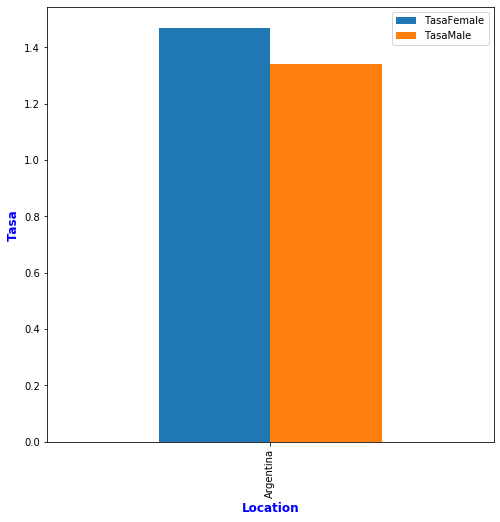

In [815]:
Tasa_x_Sexo.plot(kind='bar',figsize=(8,8))
plt.xlabel('Location',color='blue',fontsize='12',fontweight='black')
plt.ylabel('Tasa',color='blue',fontsize= '12',fontweight='black')
plt.show()